# NYC Trips: Tip Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from taxitools import utils

In [2]:
df = utils.open_taxi_clean_df()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1,74,168,1,1.20,6.00,...,7.30,2,1,0.0,3,1,0,284.0,7.30,6.08
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1,116,265,2,13.69,42.00,...,43.30,2,1,0.0,3,1,0,2155.0,43.30,3.16
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1,97,33,1,0.95,6.50,...,10.14,1,1,0.0,3,1,0,362.0,7.80,8.21
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1,74,42,1,1.24,6.50,...,7.80,2,1,0.0,3,1,0,343.0,7.80,6.29
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1,42,244,1,1.10,7.00,...,8.30,2,1,0.0,3,1,0,434.0,8.30,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,<NA>,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,<NA>,218,169,<NA>,18.04,50.24,...,59.84,<NA>,<NA>,NaN,4,2,7,2040.0,59.84,3.32
79966,<NA>,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,<NA>,74,137,<NA>,5.56,19.16,...,25.87,<NA>,<NA>,NaN,4,2,7,960.0,22.21,3.99
79967,<NA>,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,<NA>,69,75,<NA>,5.13,22.45,...,22.75,<NA>,<NA>,NaN,4,2,7,1320.0,22.75,4.43
79968,<NA>,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,<NA>,117,82,<NA>,12.58,48.62,...,54.12,<NA>,<NA>,NaN,4,2,7,1920.0,54.12,4.30


In [3]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
count,48106.000000,48106.000000,79970.000000,79970.000000,48106.000000,79970.000000,79970.000000,79970.000000,79970.000000,79970.000000,...,79970.000000,48106.000000,48106.000000,48106.000000,79970.000000,79970.000000,79970.000000,79970.000000,79970.000000,79970.000000
mean,1.876627,1.111046,107.175616,132.764262,1.321228,203.368217,20.544204,1.188638,0.294585,1.079694,...,24.435212,1.423087,1.022866,0.681739,3.002063,16.177104,13.246755,1472.306165,23.355518,12.454450
std,0.328869,0.647572,69.793481,77.020361,1.006507,4506.677352,15.454022,1.371409,0.245994,2.323399,...,17.143430,0.503143,0.149478,1.187436,1.850509,8.992790,4.932357,4680.007349,16.892298,103.603567
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.010000,0.080000,-2.750000,0.000000,0.000000,...,0.380000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.380000,0.000000
25%,2.000000,1.000000,55.000000,69.000000,1.000000,1.480000,9.000000,0.000000,0.000000,0.000000,...,11.800000,1.000000,1.000000,0.000000,1.000000,8.000000,10.000000,539.000000,10.800000,4.290000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.900000,16.000000,0.500000,0.500000,0.000000,...,19.880000,1.000000,1.000000,0.000000,3.000000,16.000000,13.000000,901.000000,18.550000,5.620000
75%,2.000000,1.000000,166.000000,203.000000,1.000000,6.430000,27.000000,2.750000,0.500000,1.750000,...,31.350000,2.000000,1.000000,0.000000,4.000000,24.000000,17.000000,1560.000000,30.300000,7.520000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,359.500000,8.250000,0.500000,87.710000,...,443.370000,5.000000,2.000000,2.750000,6.000000,31.000000,23.000000,86326.000000,369.800000,7898.000000


## Filtering Out Unwanted Values

In [4]:
df = df[df.tip_amount > 0]
df = df[df.passenger_count.notnull()]
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'day_of_week',
       'day_of_month', 'hour_of_day', 'trip_duration', 'total_without_tip',
       'fare_per_mile'],
      dtype='object')

## Groupby Averages, Unique Values

In [5]:
distance_avgs = utils.aggregateAndGroup(df,'trip_distance', 'tip_amount',np.mean) 
fare_avgs = utils.aggregateAndGroup(df,'fare_amount','tip_amount',np.mean)
day_avgs = utils.aggregateAndGroup(df,'day_of_week','tip_amount',np.mean)
totalfare_avgs = utils.aggregateAndGroup(df,'day_of_week','total_amount',np.mean)


# duration_avgs = df.groupby('trip_duration').mean()
# passenger_avgs = df.groupby('passenger_count').mean()
# vendor_avgs = df.groupby('VendorID').mean()


def unique_values(col_name):
    output = df[col_name].unique()
    output.sort()
    return output

tips = unique_values('tip_amount')
distances = unique_values('trip_distance')
fare_amounts = unique_values('fare_amount')
days = unique_values('day_of_week')

## Line Graph: Distance vs Tips

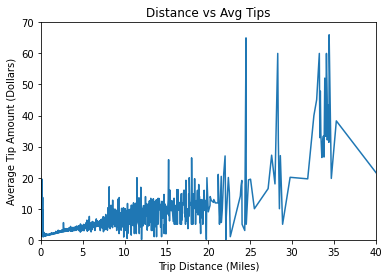

In [6]:
x = distances
y = distance_avgs['tip_amount']
plt.plot(x,y)
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Average Tip Amount (Dollars)')
plt.title('Distance vs Avg Tips') 
plt.xlim([0,40])
plt.ylim([0,70])
plt.savefig('figures/distance_tips_line')

## Scatter Plot: Distance vs Tips

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.6918874573178135

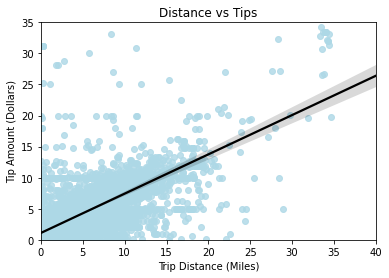

In [7]:
x = df['trip_distance']
y = df['tip_amount']
sns.regplot(x, y, scatter_kws={"color": "lightblue"}, line_kws={"color": "black"})
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Tip Amount (Dollars)')
plt.title('Distance vs Tips')
plt.xlim([0,40])
plt.ylim([0,35])
plt.savefig('figures/distance_tips_scatter')
np.corrcoef(x,y)[0][1]

## Line Graph: Total Fare Amount vs Average Tip Amount

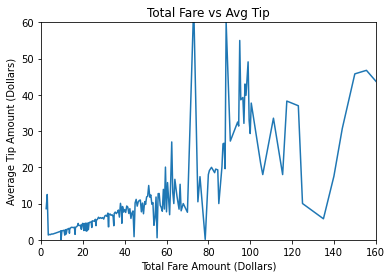

In [8]:
x = fare_amounts
y = fare_avgs['tip_amount']
plt.plot(x,y)
plt.xlabel('Total Fare Amount (Dollars)')
plt.ylabel('Average Tip Amount (Dollars)')
plt.title('Total Fare vs Avg Tip')
plt.xlim([0,160])
plt.ylim([0,60])
plt.savefig('figures/total__fare_line')

## Scatter Plot: Total Fare Amount vs Tip Amount

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.8154835771318032

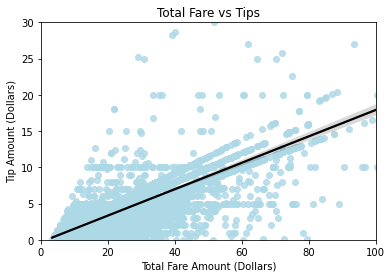

In [9]:
x = df['total_amount']
y = df['tip_amount']
sns.regplot(x, y, scatter_kws={"color": "lightblue"}, line_kws={"color": "black"})
plt.xlabel('Total Fare Amount (Dollars)')
plt.ylabel('Tip Amount (Dollars)')
plt.title('Total Fare vs Tips')
plt.xlim([0,100])
plt.ylim([0,30])
plt.savefig('figures/total__fare_scatter')
np.corrcoef(x,y)[0][1]

## Scatter Plot: Total Fare vs Tip as a % of Total Fare 

/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.0034155244881577274

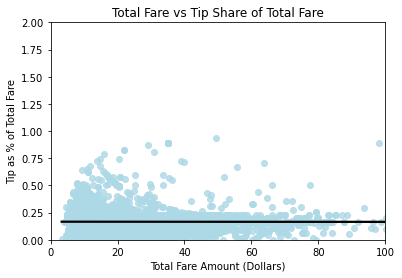

In [10]:
x = df['total_amount'] 
y = df['tip_amount'] / df['total_amount']
sns.regplot(x, y, scatter_kws={"color": "lightblue"}, line_kws={"color": "black"})
plt.xlabel('Total Fare Amount (Dollars)')
plt.ylabel('Tip as % of Total Fare')
plt.title('Total Fare vs Tip Share of Total Fare')
plt.xlim([0,100])
plt.ylim([0,2])
plt.savefig('figures/tipfare_relationship_scatter')
np.corrcoef(x,y)[0][1]

## Bar Graph (Tip Share by Day of Week)

Text(0, 0.5, 'Tip as % of Total Fare')

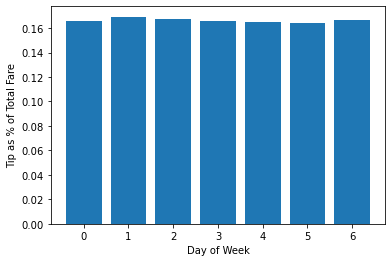

In [11]:
x = days
y = day_avgs['tip_amount'] / totalfare_avgs['total_amount']
plt.bar(x,y)
plt.xlabel('Day of Week')
plt.ylabel('Tip as % of Total Fare')